# Food Recipes

#### This dataset is providing data on recipes over various cuisines and courses.


The dataset seems to be showing various recipes and all information in relation to it.
By accessing the dataset, I am trying to find if I could know how popular a new recipe is going to be before publishing.

In order to do that I am to use linear regression approach.

### Getting to know Dataset Nature

#### Importing relevant Libraries

In [27]:
import pandas as pd
import seaborn as sns

import collections
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

#### Importing the dataset

In [28]:
data = pd.read_csv('food_recipes.csv')

#### Shows first 5 rows of the dataframe.

In [29]:
data.head()  

,recipe_title,url,record_health,vote_count,rating,description,cuisine,course,diet,prep_time,cook_time,ingredients,instructions,author,tags,category
0,Roasted Peppers And Mushroom Tortilla Pizza Re...,https://www.archanaskitchen.com/roasted-pepper...,good,434,4.958525,is a quicker version pizza to satisfy your cr...,Mexican,Dinner,Vegetarian,15 M,15 M,Tortillas|Extra Virgin Olive Oil|Garlic|Mozzar...,To begin making the Roasted Peppers And Mushro...,Divya Shivaraman,Party Food Recipes|Tea Party Recipes|Mushroom ...,Pizza Recipes
1,Thakkali Gotsu Recipe | Thakkali Curry | Spicy...,https://www.archanaskitchen.com/tomato-gotsu-r...,good,3423,4.932223,also known as the is a quick and easy to ma...,South Indian Recipes,Lunch,Vegetarian,10 M,20 M,Sesame (Gingelly) Oil|Mustard seeds (Rai/ Kadu...,To begin making Tomato Gotsu Recipe/ Thakkali ...,Archana Doshi,Vegetarian Recipes|Tomato Recipes|South Indian...,Indian Curry Recipes
2,Spicy Grilled Pineapple Salsa Recipe,https://www.archanaskitchen.com/spicy-grilled-...,good,2091,4.945959,Spicy Grilled Pineapple Salsa is a simple reci...,Mexican,Side Dish,Vegetarian,10 M,0 M,Extra Virgin Olive Oil|Pineapple|White onion|R...,To begin making the Spicy Grilled Pineapple Sa...,Archana's Kitchen,Party Starter & Appetizer Recipes|Pineapple Re...,Mexican Recipes
3,Karwar Style Dali Thoy Recipe - Toor dal Curry,https://www.archanaskitchen.com/dali-thoy-reci...,good,990,4.888889,The is a quintessential of Konkani dish whic...,Coastal Karnataka,Side Dish,High Protein Vegetarian,5 M,20 M,Arhar dal (Split Toor Dal)|Turmeric powder (Ha...,To prepare Karwar Style Dali Thoy Recipe (Toor...,Jyothi Rajesh,Side Dish Recipes|South Indian Recipes|Indian ...,Indian Curry Recipes
4,Rajma Kofta In Milk And Poppy Seed Gravy Recipe,https://www.archanaskitchen.com/rajma-kofta-in...,good,345,4.828986,Koftas are traditional Indian recipes mostly w...,North Indian Recipes,Side Dish,High Protein Vegetarian,20 M,30 M,Rajma (Large Kidney Beans)|Cashew nuts|Sultana...,To begin making Rajma Kofta In Milk And Poppy ...,RUBY PATHAK,Side Dish Recipes|Indian Lunch Recipes|Office ...,Kofta Recipes


#### Shows last 5 rows of the dataframe.


In [30]:
data.tail()

,recipe_title,url,record_health,vote_count,rating,description,cuisine,course,diet,prep_time,cook_time,ingredients,instructions,author,tags,category
8004,Zucchini and Carrot Pasta Recipe,https://www.archanaskitchen.com/zucchini-and-c...,good,738,4.934959,is a healthy recipe which can be served over ...,Italian Recipes,Dinner,Vegetarian,10 M,30 M,Spirali pasta|Onions|Tomatoes|Green zucchini|C...,To begin with Zucchini And Carrot Pasta Recipe...,Aarti Sharma,Vegetarian Recipes|Carrot Recipes|Zucchini Rec...,Pasta Recipes
8005,Hyderabadi Khatti Dal Recipe (Hyderabadi Tangy...,https://www.archanaskitchen.com/hyderabadi-kha...,good,5173,4.903151,Hyderabadi Khatti Dal is a delicious tangy dal...,Hyderabadi,Lunch,High Protein Vegetarian,20 M,40 M,Arhar dal (Split Toor Dal)|Tomato|Turmeric pow...,To begin making the Hyderabadi Khatti Dal Reci...,Farrukh Aziz Ansari,Gluten Free Recipes|Indian Diabetic Recipes,Indian Curry Recipes
8006,Karwar Style Muga Ambat Recipe (Moong Sprouts ...,https://www.archanaskitchen.com/karwar-style-m...,good,1202,4.946755,is a curry recipe made from 'Muga' - which re...,Karnataka,Side Dish,High Protein Vegetarian,10 M,15 M,Turmeric powder (Haldi)|Sugar|Salt|Fresh cocon...,To prepare Karwar Style Muga Ambat Recipe (Moo...,Archana's Kitchen,High Protein Vegetarian Diet Recipes|South Ind...,Indian Curry Recipes
8007,"Beetroot, Amla And Pudina Juice Recipe | Mint ...",https://www.archanaskitchen.com/beetroot-amla-...,good,1305,4.925670,is a healthy juice recipe which acts as a gre...,Indian,Snack,Vegetarian,10 M,0 M,Beetroot|Amla (Nellikai/ Gooseberry)|Mint Leav...,"To begin making the Beetroot, Amla And Pudina...",Archana's Kitchen,Healthy Recipes|Beetroot Recipes|Pudina Mint R...,Indian Drink Recipes
8008,Chettinad Cauliflower Pepper Fry Recipe - Chet...,https://www.archanaskitchen.com/chettinad-caul...,good,2167,4.815413,Chettinad Poo Kosu Poriyal also known as is ...,Tamil Nadu,Lunch,Vegetarian,15 M,20 M,Cauliflower (gobi)|Pearl onions (Sambar Onions...,To begin making the Chettinad Cauliflower Pepp...,Archana Doshi,Cauliflower Recipes (Phool Gobi),Poriyal Recipes (South Indian Sabzi)


#### Shows some basic statistical details like percentile, mean, std etc.


In [31]:
data.describe()

,vote_count,rating
count,8009.000000,8009.000000
mean,2268.004495,4.888621
std,3683.156570,0.077467
min,15.000000,3.175705
25%,494.000000,4.865031
50%,1050.000000,4.900553
75%,2487.000000,4.930000
max,80628.000000,5.000000


#### Shows a concise summary of a DataFrame. It includes the index dtype and column dtypes, non-null values and memory usage

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8009 entries, 0 to 8008
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recipe_title   8009 non-null   object 
 1   url            8009 non-null   object 
 2   record_health  8009 non-null   object 
 3   vote_count     8009 non-null   int64  
 4   rating         8009 non-null   float64
 5   description    7994 non-null   object 
 6   cuisine        7943 non-null   object 
 7   course         7854 non-null   object 
 8   diet           7858 non-null   object 
 9   prep_time      7979 non-null   object 
 10  cook_time      7979 non-null   object 
 11  ingredients    7997 non-null   object 
 12  instructions   8009 non-null   object 
 13  author         8009 non-null   object 
 14  tags           7930 non-null   object 
 15  category       8009 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 1001.2+ KB


#### Checking for null values

In [33]:
print(data.isnull().sum())   

recipe_title       0
url                0
record_health      0
vote_count         0
rating             0
description       15
cuisine           66
course           155
diet             151
prep_time         30
cook_time         30
ingredients       12
instructions       0
author             0
tags              79
category           0
dtype: int64


## Data cleansing

#### Dropping missing values.

In [34]:
data_clean = data.dropna()    

In [35]:
print(data_clean.isnull().sum()) 

recipe_title     0
url              0
record_health    0
vote_count       0
rating           0
description      0
cuisine          0
course           0
diet             0
prep_time        0
cook_time        0
ingredients      0
instructions     0
author           0
tags             0
category         0
dtype: int64


#### Remove M from prep_time and cook_time columns

In [36]:
cols = ['prep_time','cook_time']

data_clean[cols] = data_clean[cols].replace({'M':''}, regex = True) 

C:\Users\isuri\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [37]:
data_clean.head()

,recipe_title,url,record_health,vote_count,rating,description,cuisine,course,diet,prep_time,cook_time,ingredients,instructions,author,tags,category
0,Roasted Peppers And Mushroom Tortilla Pizza Re...,https://www.archanaskitchen.com/roasted-pepper...,good,434,4.958525,is a quicker version pizza to satisfy your cr...,Mexican,Dinner,Vegetarian,15,15,Tortillas|Extra Virgin Olive Oil|Garlic|Mozzar...,To begin making the Roasted Peppers And Mushro...,Divya Shivaraman,Party Food Recipes|Tea Party Recipes|Mushroom ...,Pizza Recipes
1,Thakkali Gotsu Recipe | Thakkali Curry | Spicy...,https://www.archanaskitchen.com/tomato-gotsu-r...,good,3423,4.932223,also known as the is a quick and easy to ma...,South Indian Recipes,Lunch,Vegetarian,10,20,Sesame (Gingelly) Oil|Mustard seeds (Rai/ Kadu...,To begin making Tomato Gotsu Recipe/ Thakkali ...,Archana Doshi,Vegetarian Recipes|Tomato Recipes|South Indian...,Indian Curry Recipes
2,Spicy Grilled Pineapple Salsa Recipe,https://www.archanaskitchen.com/spicy-grilled-...,good,2091,4.945959,Spicy Grilled Pineapple Salsa is a simple reci...,Mexican,Side Dish,Vegetarian,10,0,Extra Virgin Olive Oil|Pineapple|White onion|R...,To begin making the Spicy Grilled Pineapple Sa...,Archana's Kitchen,Party Starter & Appetizer Recipes|Pineapple Re...,Mexican Recipes
3,Karwar Style Dali Thoy Recipe - Toor dal Curry,https://www.archanaskitchen.com/dali-thoy-reci...,good,990,4.888889,The is a quintessential of Konkani dish whic...,Coastal Karnataka,Side Dish,High Protein Vegetarian,5,20,Arhar dal (Split Toor Dal)|Turmeric powder (Ha...,To prepare Karwar Style Dali Thoy Recipe (Toor...,Jyothi Rajesh,Side Dish Recipes|South Indian Recipes|Indian ...,Indian Curry Recipes
4,Rajma Kofta In Milk And Poppy Seed Gravy Recipe,https://www.archanaskitchen.com/rajma-kofta-in...,good,345,4.828986,Koftas are traditional Indian recipes mostly w...,North Indian Recipes,Side Dish,High Protein Vegetarian,20,30,Rajma (Large Kidney Beans)|Cashew nuts|Sultana...,To begin making Rajma Kofta In Milk And Poppy ...,RUBY PATHAK,Side Dish Recipes|Indian Lunch Recipes|Office ...,Kofta Recipes


#### Converting both prep_time and cook_time columns in to numeric values.

In [38]:
data_clean.prep_time = pd.to_numeric(data_clean.prep_time)

C:\Users\isuri\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [39]:
data_clean.cook_time = pd.to_numeric(data_clean.cook_time)

In [40]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7683 entries, 0 to 8008
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recipe_title   7683 non-null   object 
 1   url            7683 non-null   object 
 2   record_health  7683 non-null   object 
 3   vote_count     7683 non-null   int64  
 4   rating         7683 non-null   float64
 5   description    7683 non-null   object 
 6   cuisine        7683 non-null   object 
 7   course         7683 non-null   object 
 8   diet           7683 non-null   object 
 9   prep_time      7683 non-null   int64  
 10  cook_time      7683 non-null   int64  
 11  ingredients    7683 non-null   object 
 12  instructions   7683 non-null   object 
 13  author         7683 non-null   object 
 14  tags           7683 non-null   object 
 15  category       7683 non-null   object 
dtypes: float64(1), int64(3), object(12)
memory usage: 1020.4+ KB


#### Identifying unwanted columns and drop 

In [41]:
data_clean.head(3)

,recipe_title,url,record_health,vote_count,rating,description,cuisine,course,diet,prep_time,cook_time,ingredients,instructions,author,tags,category
0,Roasted Peppers And Mushroom Tortilla Pizza Re...,https://www.archanaskitchen.com/roasted-pepper...,good,434,4.958525,is a quicker version pizza to satisfy your cr...,Mexican,Dinner,Vegetarian,15,15,Tortillas|Extra Virgin Olive Oil|Garlic|Mozzar...,To begin making the Roasted Peppers And Mushro...,Divya Shivaraman,Party Food Recipes|Tea Party Recipes|Mushroom ...,Pizza Recipes
1,Thakkali Gotsu Recipe | Thakkali Curry | Spicy...,https://www.archanaskitchen.com/tomato-gotsu-r...,good,3423,4.932223,also known as the is a quick and easy to ma...,South Indian Recipes,Lunch,Vegetarian,10,20,Sesame (Gingelly) Oil|Mustard seeds (Rai/ Kadu...,To begin making Tomato Gotsu Recipe/ Thakkali ...,Archana Doshi,Vegetarian Recipes|Tomato Recipes|South Indian...,Indian Curry Recipes
2,Spicy Grilled Pineapple Salsa Recipe,https://www.archanaskitchen.com/spicy-grilled-...,good,2091,4.945959,Spicy Grilled Pineapple Salsa is a simple reci...,Mexican,Side Dish,Vegetarian,10,0,Extra Virgin Olive Oil|Pineapple|White onion|R...,To begin making the Spicy Grilled Pineapple Sa...,Archana's Kitchen,Party Starter & Appetizer Recipes|Pineapple Re...,Mexican Recipes


#### Checking for unique values of record_health column

In [42]:
data_clean.record_health.unique()

array(['good'], dtype=object)

In [43]:
data_clean.drop(["recipe_title","url","record_health","description","instructions","author"], axis = 1 , inplace = True)

C:\Users\isuri\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
data_clean.groupby(['diet']).sum()

,vote_count,rating,prep_time,cook_time
diet,,,,
Diabetic Friendly,916216,1438.035821,10806,8831
Eggetarian,680503,1886.183941,12427,15135
Gluten Free,96038,316.740350,3745,2425
High Protein Non Vegetarian,697650,1094.127842,5003,6575
High Protein Vegetarian,1851769,3820.312126,32240,23747
No Onion No Garlic (Sattvic),170368,365.619446,1175,2045
Non Vegeterian,1318758,2161.451299,14537,16689
Sugar Free Diet,7441,68.389621,290,290
Vegan,89003,326.227494,1678,2970


In [45]:
data_clean.groupby(['course']).sum()

,vote_count,rating,prep_time,cook_time
course,,,,
Appetizer,1278822,3674.820467,21288,19458
Brunch,3437,24.661396,70,190
Dessert,1373307,3857.315900,30489,43835
Dinner,2021192,4175.067658,24776,28947
Indian Breakfast,270402,506.907514,5435,2492
Lunch,4621987,9292.053837,44298,59005
Main Course,1114334,1837.929546,14144,12317
North Indian Breakfast,514170,693.034256,3467,3780
One Pot Dish,73560,171.157706,670,1270


In [46]:
data_clean.groupby(['diet','course']).sum()

vote_count       rating  prep_time  \
diet              course                                                       
Diabetic Friendly Appetizer                    15786    44.305566        145   
                  Dinner                       97719   117.485756        545   
                  Indian Breakfast             45249    68.027256        980   
                  Lunch                       204152   361.490029       2190   
                  Main Course                  37914    53.803647        800   
...                                              ...          ...        ...   
Vegetarian        One Pot Dish                 25598    87.563002        415   
                  Side Dish                  1902306  4065.136936      14850   
                  Snack                      1759394  4122.375175      23688   
                  South Indian Breakfast      627156   922.327062      12937   
                  World Breakfast             145639   687.148447       3017   

                                          cook_time  
diet              course                             
Diabetic Friendly Appetizer                     165  
                  Dinner                        745  
                  Indian Breakfast              365  
                  Lunch                        1875  
                  Main Course                   305  
...                                             ...  
Vegetarian        One Pot Dish                  685  
                  Side Dish                   16608  
                  Snack                       24727  
                  South Indian Breakfast       5255  
                  World Breakfast              2970  

[102 rows x 4 columns]

In [47]:
data_clean.sort_values(['course', 'vote_count'], ascending=[True, False])

,vote_count,rating,cuisine,course,diet,prep_time,cook_time,ingredients,tags,category
132,25507,4.924021,Indo Chinese,Appetizer,High Protein Non Vegetarian,15,50,Chicken|Whole Egg|Corn flour|Salt|Sunflower Oi...,Party Starter & Appetizer Recipes|High Protein...,Indian Chinese Recipes
7954,22483,4.882756,Indo Chinese,Appetizer,Vegetarian,20,20,Cauliflower (gobi)|Spring Onion Greens|Garlic|...,Party Food Recipes|Cauliflower Recipes (Phool ...,Indian Chinese Recipes
252,21020,4.891675,Chettinad,Appetizer,High Protein Non Vegetarian,10,30,Chicken|Garlic|Ginger|Turmeric powder (Haldi)|...,Party Food Recipes|Side Dish Recipes|South Ind...,Chicken Recipes
171,19539,4.883259,Kerala Recipes,Appetizer,Non Vegeterian,10,60,Mutton|Cumin powder (Jeera)|Red Chilli powder|...,Party Food Recipes|South Indian Recipes|Kerala...,Mutton Recipes
5196,19480,4.871253,Middle Eastern,Appetizer,Vegetarian,5,15,Assam tea leaves|Milk|Fresh cream|Star anise|C...,Vegetarian Recipes|Tea Party Recipes|Tea Recipes,Smoothies and Juices
...,...,...,...,...,...,...,...,...,...,...
5024,128,4.937500,Continental,World Breakfast,Vegetarian,10,25,Kaddu (Parangikai/ Pumpkin)|Broccoli|Onion|Gar...,Tomato Recipes|Broccoli Recipes|Pumpkin Recipe...,Dessert Recipes
6236,128,5.000000,Chinese,World Breakfast,High Protein Vegetarian,500,30,Yellow Moong Dal (Split)|Rice|Whole Eggs|Garli...,Breakfast Recipe Ideas|Pancake Recipes|Moong D...,Indian Chinese Recipes
4979,127,4.976378,Continental,World Breakfast,Vegetarian,15,20,Apple|Butter (unsalted)|Cinnamon Powder (Dalch...,Breakfast Recipe Ideas|Dahi Recipes (Curd/Yogu...,Pancake Recipes
5492,121,5.000000,French,World Breakfast,Non Vegeterian,10,90,All Purpose Flour (Maida)|Salt|Lemon juice|Who...,Tea Party Recipes|Quiche Recipes,Dessert Recipes


#### Checking for most popular cuisines

In [48]:
cuisine_counts  = data_clean['cuisine'].value_counts(ascending=False)

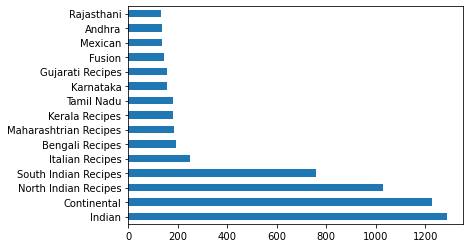

In [49]:
ax = cuisine_counts.iloc[:15].plot(kind='barh')

In [50]:
rating_counts  = data_clean['rating'].value_counts(ascending=False)

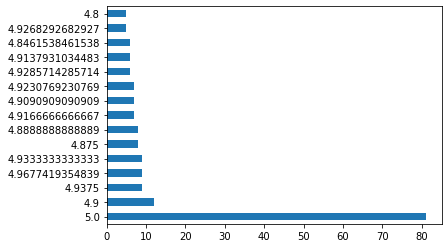

In [51]:
ax = rating_counts.iloc[:15].plot(kind='barh')

#### Scatter plot

array([[<AxesSubplot:xlabel='vote_count', ylabel='vote_count'>,
        <AxesSubplot:xlabel='rating', ylabel='vote_count'>,
        <AxesSubplot:xlabel='prep_time', ylabel='vote_count'>,
        <AxesSubplot:xlabel='cook_time', ylabel='vote_count'>],
       [<AxesSubplot:xlabel='vote_count', ylabel='rating'>,
        <AxesSubplot:xlabel='rating', ylabel='rating'>,
        <AxesSubplot:xlabel='prep_time', ylabel='rating'>,
        <AxesSubplot:xlabel='cook_time', ylabel='rating'>],
       [<AxesSubplot:xlabel='vote_count', ylabel='prep_time'>,
        <AxesSubplot:xlabel='rating', ylabel='prep_time'>,
        <AxesSubplot:xlabel='prep_time', ylabel='prep_time'>,
        <AxesSubplot:xlabel='cook_time', ylabel='prep_time'>],
       [<AxesSubplot:xlabel='vote_count', ylabel='cook_time'>,
        <AxesSubplot:xlabel='rating', ylabel='cook_time'>,
        <AxesSubplot:xlabel='prep_time', ylabel='cook_time'>,
        <AxesSubplot:xlabel='cook_time', ylabel='cook_time'>]],
      dtype=object)

<Figure size 648x576 with 0 Axes>

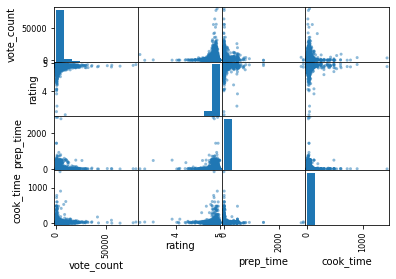

In [52]:
plt.figure(figsize=(9, 8))
pd.plotting.scatter_matrix(data_clean)

C:\Users\isuri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


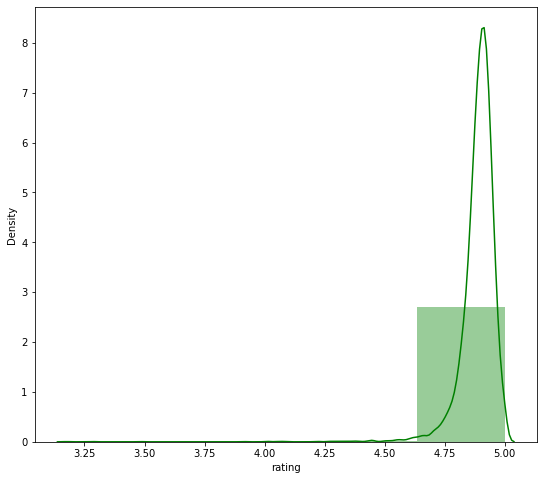

In [53]:
plt.figure(figsize=(9, 8))
sns.distplot(data['rating'], color='g', bins=5, hist_kws={'alpha': 0.4});

C:\Users\isuri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


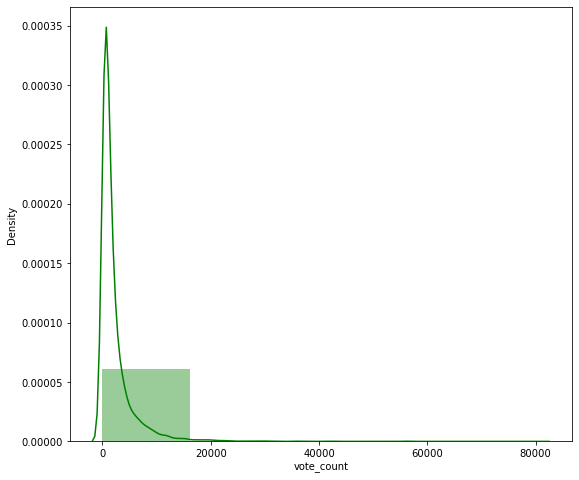

In [54]:

plt.figure(figsize=(9, 8))
sns.distplot(data['vote_count'], color='g', bins=5, hist_kws={'alpha': 0.4});

#### Applying Lambda funtion to split tags. 

#### Converting tags and ingedients columns data from string to a list  

In [55]:
# new data frame with split value columns
data_clean.tags = data_clean["tags"].str.split("|")

C:\Users\isuri\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [56]:
data_clean.ingredients = data_clean["ingredients"].str.split("|")

In [57]:
data_clean

,vote_count,rating,cuisine,course,diet,prep_time,cook_time,ingredients,tags,category
0,434,4.958525,Mexican,Dinner,Vegetarian,15,15,"[Tortillas, Extra Virgin Olive Oil, Garlic, Mo...","[Party Food Recipes, Tea Party Recipes, Mushro...",Pizza Recipes
1,3423,4.932223,South Indian Recipes,Lunch,Vegetarian,10,20,"[Sesame (Gingelly) Oil, Mustard seeds (Rai/ Ka...","[Vegetarian Recipes, Tomato Recipes, South Ind...",Indian Curry Recipes
2,2091,4.945959,Mexican,Side Dish,Vegetarian,10,0,"[Extra Virgin Olive Oil, Pineapple, White onio...","[Party Starter & Appetizer Recipes, Pineapple ...",Mexican Recipes
3,990,4.888889,Coastal Karnataka,Side Dish,High Protein Vegetarian,5,20,"[Arhar dal (Split Toor Dal), Turmeric powder (...","[Side Dish Recipes, South Indian Recipes, Indi...",Indian Curry Recipes
4,345,4.828986,North Indian Recipes,Side Dish,High Protein Vegetarian,20,30,"[Rajma (Large Kidney Beans), Cashew nuts, Sult...","[Side Dish Recipes, Indian Lunch Recipes, Offi...",Kofta Recipes
...,...,...,...,...,...,...,...,...,...,...
8004,738,4.934959,Italian Recipes,Dinner,Vegetarian,10,30,"[Spirali pasta, Onions, Tomatoes, Green zucchi...","[Vegetarian Recipes, Carrot Recipes, Zucchini ...",Pasta Recipes
8005,5173,4.903151,Hyderabadi,Lunch,High Protein Vegetarian,20,40,"[Arhar dal (Split Toor Dal), Tomato, Turmeric ...","[Gluten Free Recipes, Indian Diabetic Recipes]",Indian Curry Recipes
8006,1202,4.946755,Karnataka,Side Dish,High Protein Vegetarian,10,15,"[Turmeric powder (Haldi), Sugar, Salt, Fresh c...","[High Protein Vegetarian Diet Recipes, South I...",Indian Curry Recipes
8007,1305,4.925670,Indian,Snack,Vegetarian,10,0,"[Beetroot, Amla (Nellikai/ Gooseberry), Mint L...","[Healthy Recipes, Beetroot Recipes, Pudina Min...",Indian Drink Recipes


#### Creating tags_list and ingredients_list lists

In [58]:
tags_list = list(itertools.chain.from_iterable(data_clean.tags))
ingredients_list = list(itertools.chain.from_iterable(data_clean.ingredients))

In [59]:
# No of unique tags
len(set(tags_list))

650

In [60]:
# No of unique ingredients
len(set(ingredients_list))

1792

#### Checking for most popular tags

In [61]:
tags_counter=collections.Counter(tags_list)

In [62]:
print(tags_counter.most_common(5))

[('Indian Lunch Recipes', 1955), ('Party Food Recipes', 1444), ('Healthy Recipes', 1401), ('Side Dish Recipes', 1292), ('Vegetarian Recipes', 1200)]


In [63]:
ingredeient_counter=collections.Counter(ingredients_list)

In [64]:
print(ingredeient_counter.most_common(5))

[('Salt', 5526), ('Sunflower Oil', 2195), ('Turmeric powder (Haldi)', 2174), ('Garlic', 2157), ('Onion', 1967)]


### One Hot Encoding Catergorical Values

#### Creating a method to check for values in the list

In [65]:
def search_value(value, list):
  if value in list:
    exsits = 1
  else:
    exsits = 0
  return exsits

In [66]:
for each_value in set(tags_list):
  data_clean[each_value] = data_clean.apply(lambda row: search_value(each_value,row['tags']),axis=1)

<ipython-input-66-3b657a598a64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[each_value] = data_clean.apply(lambda row: search_value(each_value,row['tags']),axis=1)


In [67]:
for each_value in set(ingredients_list):
  data_clean[each_value] = data_clean.apply(lambda row: search_value(each_value,row['ingredients']),axis=1)

<ipython-input-67-f8f821e3c93f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[each_value] = data_clean.apply(lambda row: search_value(each_value,row['ingredients']),axis=1)


In [68]:
data_clean.drop(['ingredients','tags'], axis = 1, inplace = True)

C:\Users\isuri\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
data_clean = pd.get_dummies(data_clean, columns = ['cuisine', 'course','diet','category'])

In [70]:
data_clean.head(4)

,vote_count,rating,prep_time,cook_time,Bhindi Recipes (Vendakkai /Okra /Ladies Finger),Ash Gourd Recipes,Thanksgiving Recipes,Chakli Recipes,Moongphali Reipes,Kosambari Recipes,...,category_Sweet Recipes (Indian Mithai / Indian Dessert),"category_Thai Recipes,Malaysian & East Asian Recipes",category_Thepla Recipes,category_Thoran Recipes,category_Toast Recipes,category_Upma Recipes,category_Uttapam Recipes,category_Variety Rice (Mixed Rice/ Flavoured Rice Recipes),category_Waffle Recipes,category_World Recipes
0,434,4.958525,15,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3423,4.932223,10,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2091,4.945959,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,990,4.888889,5,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Spliting Data to Train and Test

In [71]:
x = data_clean.drop(['rating', 'vote_count'], axis = 1)

In [72]:
x.head(4)

,prep_time,cook_time,Bhindi Recipes (Vendakkai /Okra /Ladies Finger),Ash Gourd Recipes,Thanksgiving Recipes,Chakli Recipes,Moongphali Reipes,Kosambari Recipes,Vegetarian Recipes,Green Chilli Recipes,...,category_Sweet Recipes (Indian Mithai / Indian Dessert),"category_Thai Recipes,Malaysian & East Asian Recipes",category_Thepla Recipes,category_Thoran Recipes,category_Toast Recipes,category_Upma Recipes,category_Uttapam Recipes,category_Variety Rice (Mixed Rice/ Flavoured Rice Recipes),category_Waffle Recipes,category_World Recipes
0,15,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,20,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
y = data_clean.rating

In [74]:
y

0       4.958525
1       4.932223
2       4.945959
3       4.888889
4       4.828986
          ...   
8004    4.934959
8005    4.903151
8006    4.946755
8007    4.925670
8008    4.815413
Name: rating, Length: 7683, dtype: float64

### Splitting Training Predicting and Evaluating the dataset

#### Splitting test and train sets randomly

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#### Training

In [76]:
reg = LinearRegression().fit(X_train, y_train)

#### Predicitons

In [77]:
y_pred = reg.predict(X_test)

In [78]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [79]:
df

,Actual,Predicted
3860,4.920000,4.913702e+00
4194,4.987179,4.933421e+00
4297,4.968789,4.970629e+00
541,4.951140,4.851529e+00
1591,4.900097,-9.124014e+06
...,...,...
4364,4.871504,4.916332e+00
2472,4.853838,4.870683e+00
6217,4.575868,4.911169e+00
4329,4.877746,4.892612e+00


In [80]:
titles = data[['recipe_title']]

In [81]:
titles

,recipe_title
0,Roasted Peppers And Mushroom Tortilla Pizza Re...
1,Thakkali Gotsu Recipe | Thakkali Curry | Spicy...
2,Spicy Grilled Pineapple Salsa Recipe
3,Karwar Style Dali Thoy Recipe - Toor dal Curry
4,Rajma Kofta In Milk And Poppy Seed Gravy Recipe
...,...
8004,Zucchini and Carrot Pasta Recipe
8005,Hyderabadi Khatti Dal Recipe (Hyderabadi Tangy...
8006,Karwar Style Muga Ambat Recipe (Moong Sprouts ...
8007,"Beetroot, Amla And Pudina Juice Recipe | Mint ..."


In [82]:
titles.join(df, how = 'inner')

,recipe_title,Actual,Predicted
1,Thakkali Gotsu Recipe | Thakkali Curry | Spicy...,4.932223,4.906159
6,Mexican Green Sauce Recipe,4.956522,4.979345
8,Schezwan Style Chinese Veg Samosa Recipe - Roz...,4.931330,4.879702
9,Pineapple Upside Down Cake Recipe,4.782188,5.078032
12,Savory Shrimps On Skillet Recipe,5.000000,4.868209
...,...,...,...
7986,Karnataka Style Avarekalu Akki Rotti Recipe,4.822714,4.850318
7988,Ukad Recipe (Maharashtrian Rice Flour Porridge),4.905766,4.921264
8001,Cauliflower And Red Bell Pepper Stir Fry Recipe,4.937117,4.870151
8005,Hyderabadi Khatti Dal Recipe (Hyderabadi Tangy...,4.903151,4.889980


#### Evaluating Predctions

In [83]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

NameError: name 'metrics' is not defined